### Solved by John Alexander Osorio Henao - C.C. 1035435726

Use scikit-learn to perform digit classification using data from Homework 2 (mnist_test.csv)

We use the pixels as features.

In [1]:
#required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#loading to pandas DF

images_df = pd.read_csv("mnist_test.csv", sep=",")
images_df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#let's select the x_data and y_data
y_data = images_df["label"].to_numpy()
X_data = images_df.loc[:, images_df.columns !="label"].to_numpy()
X_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
#let's split it into data and train datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,test_size = 0.2)

In [5]:
#now let's build our logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print(f'Accuracy of Logistic regression classifier on training set: {logreg.score(X_train, y_train):.2f}')
print(f'Accuracy of Logistic regression classifier on test set: {logreg.score(X_test, y_test):.2f}')

Accuracy of Logistic regression classifier on training set: 0.99
Accuracy of Logistic regression classifier on test set: 0.88


C:\Users\alexo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


for this subset, the number of correct predictions was 14 out of 16 - 0.88%


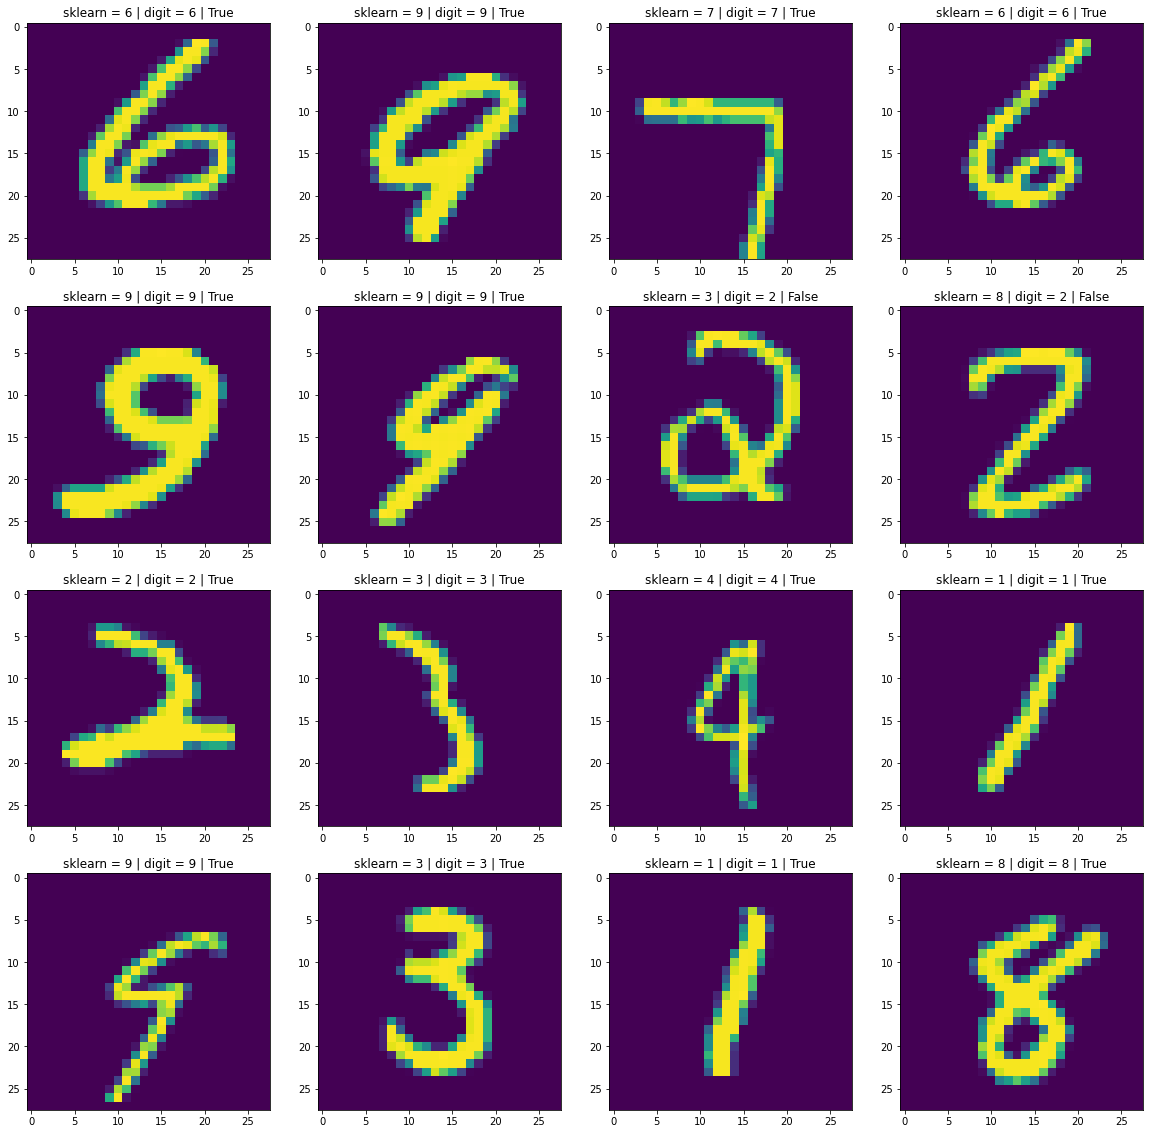

In [6]:
#now let's use a random set and see how it performs
#this is used simply to use subplots 4x4
L = 4
N = L**2
#generating random indexes
num_samples = len(y_test)
rand_idx = np.random.randint(0, num_samples, N)

fig, ax = plt.subplots(L, L, figsize=(20, 20))
#to sum the right predictions
predicted = 0
for i in range(N):
    #calc the row and column in the subplot    
    row = int(i / L)
    col = i - row*L
    #the actual index
    j = rand_idx[i]
    #the images are 28x28
    image = X_test[j].reshape(28, 28)
    #let's predict the value
    digit = logreg.predict(X_test[j].reshape(1,-1))[0]
    #let's plot and check if the prediction is right
    ax[row, col].set_title(f"sklearn = {digit:d} | digit = {y_test[j]:d} | {digit == y_test[j]}")
    predicted += int(digit == y_test[j])
    ax[row, col].imshow(image,aspect='auto')
    
print(f"for this subset, the number of correct predictions was {predicted:d} out of {N:d} - {predicted/N:.2f}%")